# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Export Data

In [2]:
df = pd.read_csv("airbusadsb.csv", index_col=False)
df.head(10)

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour
0,1513182749,3807fa,55.959607,10.156174,189.004793,184.996761,0.0,NaN,False,False,False,7671,8534.4,11475.72,1.513183e+09,1.513183e+09,1513180800
1,1513182750,3807fa,55.959607,10.156174,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,11475.72,1.513183e+09,1.513183e+09,1513180800
2,1513182751,3807fa,55.956253,10.155612,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,11475.72,1.513183e+09,1.513183e+09,1513180800
3,1513182752,3807fa,55.956253,10.155612,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,8122.92,1.513183e+09,1.513183e+09,1513180800
4,1513182753,3807fa,55.956253,10.155612,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,8122.92,1.513183e+09,1.513183e+09,1513180800
5,1513182754,3807fa,55.956253,10.155612,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,8122.92,1.513183e+09,1.513183e+09,1513180800
6,1513182755,3807fa,55.956253,10.155612,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,8122.92,1.513183e+09,1.513183e+09,1513180800
7,1513182756,3807fa,55.956253,10.155612,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,8122.92,1.513183e+09,1.513183e+09,1513180800
8,1513182757,3807fa,55.956253,10.155612,189.004793,184.996761,0.0,AIB232E,False,False,False,7671,8534.4,8122.92,1.513183e+09,1.513183e+09,1513180800
9,1513182758,3807fa,55.956253,10.155612,188.492310,185.010381,0.0,AIB232E,False,False,False,7671,8534.4,8122.92,1.513183e+09,1.513183e+09,1513180800


# EDA for Original Data

In [3]:
print(df.shape)
print(df.info())

(2383, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           2383 non-null   int64  
 1   icao24         2383 non-null   object 
 2   lat            2383 non-null   float64
 3   lon            2383 non-null   float64
 4   velocity       2383 non-null   float64
 5   heading        2383 non-null   float64
 6   vertrate       2383 non-null   float64
 7   callsign       2382 non-null   object 
 8   onground       2383 non-null   bool   
 9   alert          2383 non-null   bool   
 10  spi            2383 non-null   bool   
 11  squawk         2383 non-null   int64  
 12  baroaltitude   2382 non-null   float64
 13  geoaltitude    2381 non-null   float64
 14  lastposupdate  2383 non-null   float64
 15  lastcontact    2383 non-null   float64
 16  hour           2383 non-null   int64  
dtypes: bool(3), float64(9), int64(3), object(

This shows the size and information about original data

# Develop new data feature 1 - distance from airport

In [4]:
df2 = df.drop(columns=['icao24','vertrate','callsign','onground','alert','alert','spi','squawk','baroaltitude',
                      'lastposupdate','lastcontact','hour'])

Add coordinates for hamburg finkenwerder airport

In [5]:
df2['runway_lat'] = '53.53895'
df2['runway_lon'] = '9.843233'

In [6]:
df2.head(5)

,time,lat,lon,velocity,heading,geoaltitude,runway_lat,runway_lon
0,1513182749,55.959607,10.156174,189.004793,184.996761,11475.72,53.53895,9.843233
1,1513182750,55.959607,10.156174,189.004793,184.996761,11475.72,53.53895,9.843233
2,1513182751,55.956253,10.155612,189.004793,184.996761,11475.72,53.53895,9.843233
3,1513182752,55.956253,10.155612,189.004793,184.996761,8122.92,53.53895,9.843233
4,1513182753,55.956253,10.155612,189.004793,184.996761,8122.92,53.53895,9.843233


Check data type for all columns/features

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         2383 non-null   int64  
 1   lat          2383 non-null   float64
 2   lon          2383 non-null   float64
 3   velocity     2383 non-null   float64
 4   heading      2383 non-null   float64
 5   geoaltitude  2381 non-null   float64
 6   runway_lat   2383 non-null   object 
 7   runway_lon   2383 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 149.1+ KB


In [8]:
df2['runway_lat'] = df2['runway_lat'].astype(float)
df2['runway_lon'] = df2['runway_lon'].astype(float)

Conversion done, now to use haversine formula to get distance and convert to nautical miles

In [9]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6373 * c
    nm = km / 1.852
    return nm

In [10]:
df2['dist_from_airport_nm'] = haversine_np(df2['lon'],df2['lat'],df2['runway_lon'], df2['runway_lat'])

Explore and understand top and bottom rows of the newly formed dataframe

In [11]:
#df2.head(10)

In [12]:
#df2.tail(100)

# Plot actual flight path in 3D

Use data from aircraft distance from airport, timestamps and recorded geoaltitude

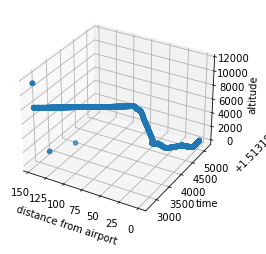

In [13]:
fig = plt.figure
ax = plt.axes(projection='3d')
x1 = df2['dist_from_airport_nm']
y1 = df2['time']
z1 = df2['geoaltitude']

plt.gca().invert_xaxis()
ax.set_xlabel('distance from airport')
ax.set_ylabel('time')
ax.set_zlabel('altitude')
ax.scatter3D(x1, y1, z1, cmap='Greens')

Use data from aircraft distance from airport, heading and recorded geoaltitude

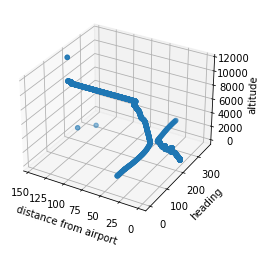

In [14]:
fig = plt.figure
ax = plt.axes(projection='3d')
x1 = df2['dist_from_airport_nm']
y1 = df2['heading']
z1 = df2['geoaltitude']

plt.gca().invert_xaxis()
ax.set_xlabel('distance from airport')
ax.set_ylabel('heading')
ax.set_zlabel('altitude')
ax.scatter3D(x1, y1, z1, cmap='Greens')

Do 2D scatter plots to understand the data showcased in the above 3D diagram better

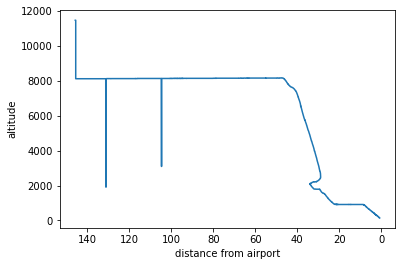

In [15]:
plt.figure
x1 = df2['dist_from_airport_nm']
y1 = df2['geoaltitude']

plt.gca().invert_xaxis()
plt.xlabel('distance from airport')
plt.ylabel('altitude')
plt.plot(x1, y1)

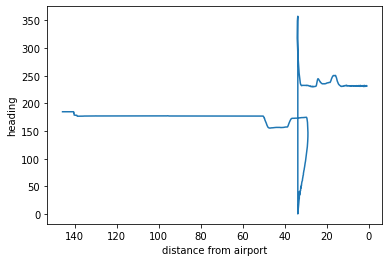

In [16]:
plt.figure
x1 = df2['dist_from_airport_nm']
y1 = df2['heading']

plt.gca().invert_xaxis()
plt.xlabel('distance from airport')
plt.ylabel('heading')
plt.plot(x1, y1)

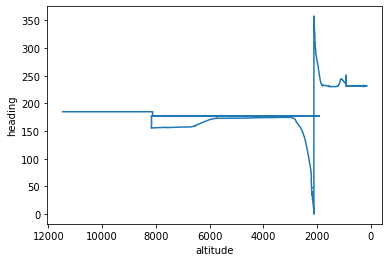

In [17]:
plt.figure
x1 = df2['geoaltitude']
y1 = df2['heading']

plt.gca().invert_xaxis()
plt.xlabel('altitude')
plt.ylabel('heading')
plt.plot(x1, y1)

Observations: aircraft changed directions when pilot plans to land
We need to find out at which point of flight did the aircraft change directions.
From the instrument approach chart, we assume that the pilot starts landing procedures at around 914.5 metres (3000ft)

# Extract Landing Profile

In [18]:
df3 = df2[df2['geoaltitude']<914.4]

Plot 2d landing profile, using data from timestamps, geoaltitude, heading and aircraft position away from airport

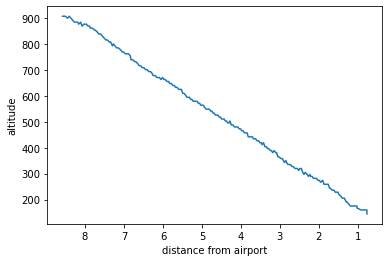

In [19]:
plt.figure
x1 = df3['dist_from_airport_nm']
y1 = df3['geoaltitude']

plt.gca().invert_xaxis()
plt.xlabel('distance from airport')
plt.ylabel('altitude')
plt.plot(x1, y1)

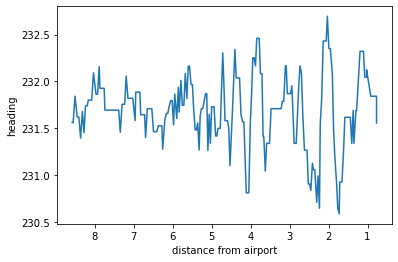

In [20]:
plt.figure
x1 = df3['dist_from_airport_nm']
y1 = df3['heading']

plt.gca().invert_xaxis()
plt.xlabel('distance from airport')
plt.ylabel('heading')
plt.plot(x1, y1)

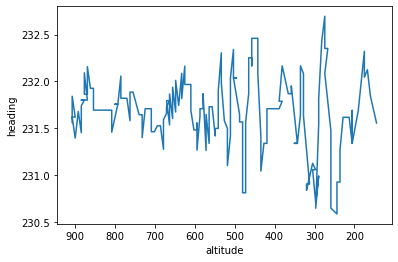

In [21]:
plt.figure
x1 = df3['geoaltitude']
y1 = df3['heading']

plt.gca().invert_xaxis()
plt.xlabel('altitude')
plt.ylabel('heading')
plt.plot(x1, y1)

Plot landing profile in 3D

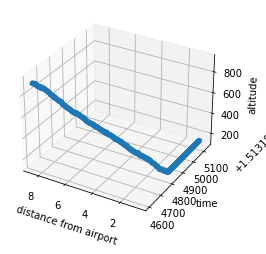

In [22]:
fig = plt.figure
ax = plt.axes(projection='3d')
x1 = df3['dist_from_airport_nm']
y1 = df3['time']
z1 = df3['geoaltitude']

plt.gca().invert_xaxis()
ax.set_xlabel('distance from airport')
ax.set_ylabel('time')
ax.set_zlabel('altitude')
ax.scatter3D(x1, y1, z1, cmap='Greens')

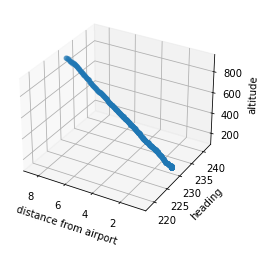

In [23]:
fig = plt.figure
ax = plt.axes(projection='3d')
x1 = df3['dist_from_airport_nm']
y1 = np.round((df3['heading'])/10)*10
z1 = df3['geoaltitude']

plt.gca().invert_xaxis()
ax.set_xlabel('distance from airport')
ax.set_ylabel('heading')
ax.set_zlabel('altitude')
ax.scatter3D(x1, y1, z1, cmap='Greens')

# Develop new data features 2 and/or 3 - difference between actual and target altitude for every flight position

This is in line with the actual task of calculating the difference between actual 3D flight path and target approach path.

There are 2 approaches to compute the target approach path from every flight position recorded.
1) Compute the actual vertical angle to chart the target approach path.  We can use the mean of all computed actual vertical angles at every flight position and/or effective actual vertical approach angle, starting from the point the plane starts to runway

2) Use the target vertical approach angle from instrument chart

Let's start with approach 2 first as we assume that all aircrafts will follow the instructions from the instrument approach charts

First, let's compute max and min for geoaltitude and distance between aircraft and airport for every flight position

In [24]:
print(df3['geoaltitude'].max())
print(df3['geoaltitude'].min())
print(df3['dist_from_airport_nm'].max())
print(df3['dist_from_airport_nm'].min())

906.78
144.78
8.575382562555033
0.769609654810891


Compute altitude difference between preceding and current row values in metres

In [25]:
df4 = df3
df4['alt_diff'] = df4['geoaltitude'].diff()
df4.head(5)

<ipython-input-25-9bcf0140f495>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['alt_diff'] = df4['geoaltitude'].diff()


,time,lat,lon,velocity,heading,geoaltitude,runway_lat,runway_lon,dist_from_airport_nm,alt_diff
1859,1513184609,53.627573,10.031810,82.753558,231.562699,906.78,53.53895,9.843233,8.575383,NaN
1860,1513184610,53.627335,10.031224,82.753558,231.562699,906.78,53.53895,9.843233,8.550130,0.00
1861,1513184611,53.626828,10.030194,82.434735,231.842773,906.78,53.53895,9.843233,8.502497,0.00
1862,1513184612,53.626269,10.028983,82.030834,231.620776,899.16,53.53895,9.843233,8.447833,-7.62
1863,1513184613,53.625804,10.028013,82.030834,231.620776,906.78,53.53895,9.843233,8.403408,7.62


Compute difference in preceding and current row values for distance away from airport in metres

In [26]:
df4['dist_airport_diff_metres'] = df4['dist_from_airport_nm'].diff().apply(lambda x:x*1852)
df4.head(5)

<ipython-input-26-1b303dcefc13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['dist_airport_diff_metres'] = df4['dist_from_airport_nm'].diff().apply(lambda x:x*1852)


,time,lat,lon,velocity,heading,geoaltitude,runway_lat,runway_lon,dist_from_airport_nm,alt_diff,dist_airport_diff_metres
1859,1513184609,53.627573,10.031810,82.753558,231.562699,906.78,53.53895,9.843233,8.575383,NaN,NaN
1860,1513184610,53.627335,10.031224,82.753558,231.562699,906.78,53.53895,9.843233,8.550130,0.00,-46.768364
1861,1513184611,53.626828,10.030194,82.434735,231.842773,906.78,53.53895,9.843233,8.502497,0.00,-88.215036
1862,1513184612,53.626269,10.028983,82.030834,231.620776,899.16,53.53895,9.843233,8.447833,-7.62,-101.238453
1863,1513184613,53.625804,10.028013,82.030834,231.620776,906.78,53.53895,9.843233,8.403408,7.62,-82.274994


Then we compute the actual vertical approach angle

In [27]:
#actual vertical angle in degrees
df4['ava']=np.arctan(df4['alt_diff'].abs()/df4['dist_airport_diff_metres'].abs()).apply(lambda x: x*180/3.14159265)
df4.head(5)

<ipython-input-27-49778572a0dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ava']=np.arctan(df4['alt_diff'].abs()/df4['dist_airport_diff_metres'].abs()).apply(lambda x: x*180/3.14159265)


,time,lat,lon,velocity,heading,geoaltitude,runway_lat,runway_lon,dist_from_airport_nm,alt_diff,dist_airport_diff_metres,ava
1859,1513184609,53.627573,10.031810,82.753558,231.562699,906.78,53.53895,9.843233,8.575383,NaN,NaN,NaN
1860,1513184610,53.627335,10.031224,82.753558,231.562699,906.78,53.53895,9.843233,8.550130,0.00,-46.768364,0.000000
1861,1513184611,53.626828,10.030194,82.434735,231.842773,906.78,53.53895,9.843233,8.502497,0.00,-88.215036,0.000000
1862,1513184612,53.626269,10.028983,82.030834,231.620776,899.16,53.53895,9.843233,8.447833,-7.62,-101.238453,4.304413
1863,1513184613,53.625804,10.028013,82.030834,231.620776,906.78,53.53895,9.843233,8.403408,7.62,-82.274994,5.291424


Plot computed actual vertical angles to check for abnormalities

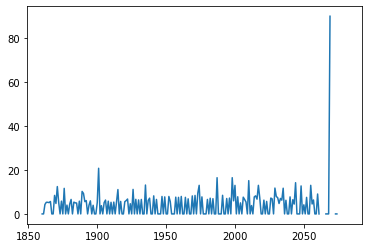

In [28]:
plt.figure
x1 = df4.index
y1 = df4['ava']
plt.plot(x1, y1)

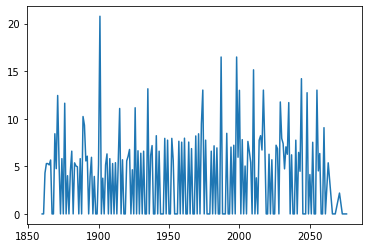

In [29]:
#remove the abnormality
df4 = df4[df4['ava']<90]
plt.figure
x1 = df4.index
y1 = df4['ava']
plt.plot(x1, y1)

In [30]:
df4.head(5)

,time,lat,lon,velocity,heading,geoaltitude,runway_lat,runway_lon,dist_from_airport_nm,alt_diff,dist_airport_diff_metres,ava
1860,1513184610,53.627335,10.031224,82.753558,231.562699,906.78,53.53895,9.843233,8.550130,0.00,-46.768364,0.000000
1861,1513184611,53.626828,10.030194,82.434735,231.842773,906.78,53.53895,9.843233,8.502497,0.00,-88.215036,0.000000
1862,1513184612,53.626269,10.028983,82.030834,231.620776,899.16,53.53895,9.843233,8.447833,-7.62,-101.238453,4.304413
1863,1513184613,53.625804,10.028013,82.030834,231.620776,906.78,53.53895,9.843233,8.403408,7.62,-82.274994,5.291424
1864,1513184614,53.625338,10.027044,81.628177,231.396585,899.16,53.53895,9.843233,8.358983,-7.62,-82.275496,5.291392


It is observed that al initial missing values are taken care of.

In [31]:
#streamline the dataframe
df5 = df4[['time', 'velocity', 'heading','geoaltitude', 'dist_from_airport_nm']]
df5.head()

,time,velocity,heading,geoaltitude,dist_from_airport_nm
1860,1513184610,82.753558,231.562699,906.78,8.550130
1861,1513184611,82.434735,231.842773,906.78,8.502497
1862,1513184612,82.030834,231.620776,899.16,8.447833
1863,1513184613,82.030834,231.620776,906.78,8.403408
1864,1513184614,81.628177,231.396585,899.16,8.358983


Calculate target altitude from vertical approach instructed from instrument approach chart
3 degrees = 0.0523599 radians

In [32]:
def target_altitude(distance):
    target_metres = 1852*distance*(np.tan(0.0523599))
    return target_metres

df5['target_alt'] = target_altitude(df5['dist_from_airport_nm'])
df5.head()

<ipython-input-32-600a34768aee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['target_alt'] = target_altitude(df5['dist_from_airport_nm'])


,time,velocity,heading,geoaltitude,dist_from_airport_nm,target_alt
1860,1513184610,82.753558,231.562699,906.78,8.550130,829.869163
1861,1513184611,82.434735,231.842773,906.78,8.502497,825.246007
1862,1513184612,82.030834,231.620776,899.16,8.447833,819.940323
1863,1513184613,82.030834,231.620776,906.78,8.403408,815.628471
1864,1513184614,81.628177,231.396585,899.16,8.358983,811.316593


Add target true track/heading approach to dataframe

In [33]:
df5['target_heading']='230.2'
df5['target_heading']=df5['target_heading'].astype(float)

<ipython-input-33-0f9856df00f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['target_heading']='230.2'
<ipython-input-33-0f9856df00f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['target_heading']=df5['target_heading'].astype(float)


In [34]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1860 to 2076
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  210 non-null    int64  
 1   velocity              210 non-null    float64
 2   heading               210 non-null    float64
 3   geoaltitude           210 non-null    float64
 4   dist_from_airport_nm  210 non-null    float64
 5   target_alt            210 non-null    float64
 6   target_heading        210 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 13.1 KB


Let's visualise the differences in the flight paths in 2D and 3D

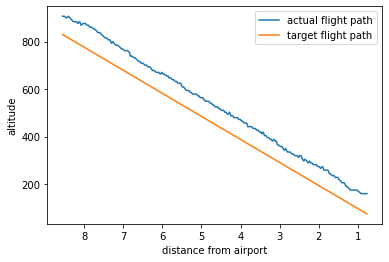

In [35]:
x1 = df5['dist_from_airport_nm']
y1 = df5['geoaltitude']
plt.plot(x1, y1, label='actual flight path')
x2 = df5['dist_from_airport_nm']
y2 = df5['target_alt']
plt.plot(x2, y2, label='target flight path')
plt.gca().invert_xaxis()
plt.xlabel('distance from airport')
plt.ylabel('altitude')
plt.legend()
plt.show()

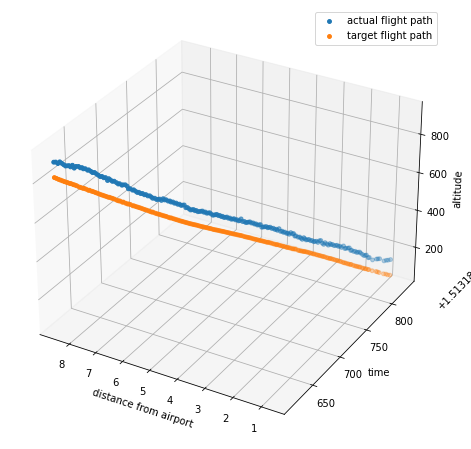

In [36]:
figure(figsize=(8,8))
fig = plt.figure

ax = plt.axes(projection='3d')
x1 = df5['dist_from_airport_nm']
y1 = df5['time']
z1 = df5['geoaltitude']
plt.gca().invert_xaxis()
ax.set_ylim3d(1513184605,1513184840)
ax.scatter3D(x1, y1, z1, s=15, linewidths = 1, label='actual flight path')

#ax = plt.axes(projection='3d')
x2 = df5['dist_from_airport_nm']
y2 = df5['time']
z2 = df5['target_alt']
#plt.gca().invert_xaxis()
ax.set_ylim3d(1513184605,1513184840)
ax.scatter3D(x2, y2, z2, s=15, linewidths = 1, label='target flight path')

ax.set_xlabel('distance from airport')
ax.set_ylabel('time')
ax.set_zlabel('altitude')
ax.legend()

#ax.set_ylim3d(1513184605,1513184840)



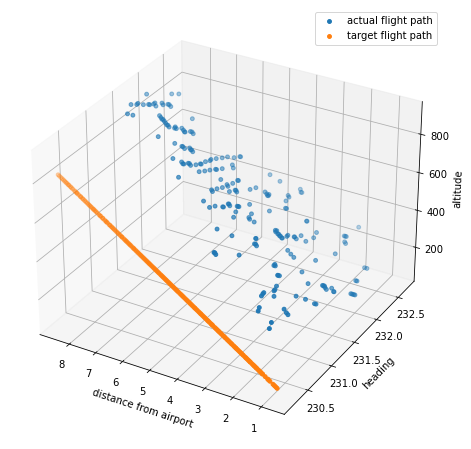

In [37]:
figure(figsize=(8,8))
fig = plt.figure

ax = plt.axes(projection='3d')
x1 = df5['dist_from_airport_nm']
y1 = df5['heading']
z1 = df5['geoaltitude']
plt.gca().invert_xaxis()
#ax.set_ylim3d(1513184605,1513184840)
ax.scatter3D(x1, y1, z1, s=15, linewidths = 1, label='actual flight path')

#ax = plt.axes(projection='3d')
x2 = df5['dist_from_airport_nm']
y2 = df5['target_heading']
z2 = df5['target_alt']
#plt.gca().invert_xaxis()
#ax.set_ylim3d(1513184605,1513184840)
ax.scatter3D(x2, y2, z2, s=15, linewidths = 1, label='target flight path')

ax.set_xlabel('distance from airport')
ax.set_ylabel('heading')
ax.set_zlabel('altitude')
ax.legend()

#ax.set_ylim3d(1513184605,1513184840)


In [38]:
print(df5['target_alt'].max())
print(df5['target_alt'].min())
print(df5['dist_from_airport_nm'].max())
print(df5['dist_from_airport_nm'].min())

829.8691634307222
74.6977350463915
8.550129666039641
0.769609654810891


# Develop new data features 3/4 - difference between actual and target altitude, difference between actual and target heading

In [39]:
df6 = df5

In [40]:
df6['alt_dev'] = df6['geoaltitude']-df6['target_alt']
df6['heading_diff'] = df6['heading'] - df6['target_heading']
df6.head(5)

<ipython-input-40-c5d40f21a7f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['alt_dev'] = df6['geoaltitude']-df6['target_alt']
<ipython-input-40-c5d40f21a7f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['heading_diff'] = df6['heading'] - df6['target_heading']


,time,velocity,heading,geoaltitude,dist_from_airport_nm,target_alt,target_heading,alt_dev,heading_diff
1860,1513184610,82.753558,231.562699,906.78,8.550130,829.869163,230.2,76.910837,1.362699
1861,1513184611,82.434735,231.842773,906.78,8.502497,825.246007,230.2,81.533993,1.642773
1862,1513184612,82.030834,231.620776,899.16,8.447833,819.940323,230.2,79.219677,1.420776
1863,1513184613,82.030834,231.620776,906.78,8.403408,815.628471,230.2,91.151529,1.420776
1864,1513184614,81.628177,231.396585,899.16,8.358983,811.316593,230.2,87.843407,1.196585


Let's visualise the data

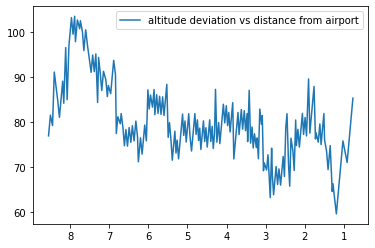

In [41]:
x1 = df6['dist_from_airport_nm']
y1 = df6['alt_dev']
plt.plot(x1, y1, label= 'altitude deviation vs distance from airport')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

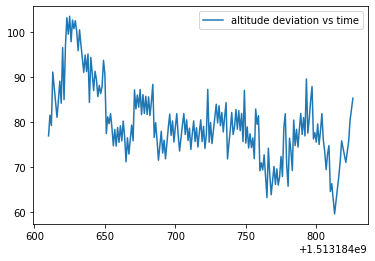

In [42]:
x1 = df6['time']
y1 = df6['alt_dev']
plt.plot(x1, y1, label= 'altitude deviation vs time')
plt.legend()
plt.show()

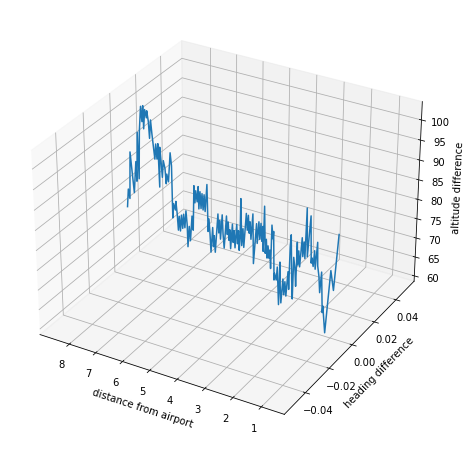

In [43]:
figure(figsize=(8,8))
fig = plt.figure

ax = plt.axes(projection='3d')
x1 = df6['dist_from_airport_nm']
y1 = np.round((df6['heading_diff'])/10)*10
z1 = df6['alt_dev']
plt.gca().invert_xaxis()
#ax.set_ylim3d(1513184605,1513184840)
ax.set_xlabel('distance from airport')
ax.set_ylabel('heading difference')
ax.set_zlabel('altitude difference')
ax.plot(x1, y1, z1)

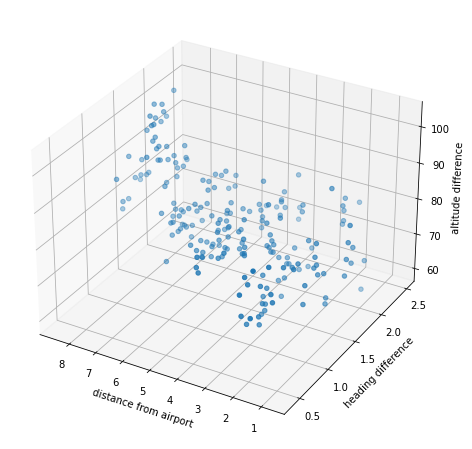

In [44]:
figure(figsize=(8,8))
fig = plt.figure

ax = plt.axes(projection='3d')
x1 = df6['dist_from_airport_nm']
y1 = df6['heading_diff']
z1 = df6['alt_dev']
plt.gca().invert_xaxis()
#ax.set_ylim3d(1513184605,1513184840)
ax.set_xlabel('distance from airport')
ax.set_ylabel('heading difference')
ax.set_zlabel('altitude difference')
ax.scatter3D(x1, y1, z1)

In [45]:
df6.to_csv('adsb_fe_us_2.csv', index=False)